# Titanic: Machine Learning from Disaster 
## Data Processing
#### 0. Descrição

Processamento dos dados de treino e de teste do problema Titanic.

* Inserção (*Imput*) de dados faltosos
* Exclusão de algumas colunas
* Modificação de tipos de dados 

#### 1. Leitura dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

datapaths = ["../data/train.csv", "../data/test.csv"]
datasets = [pd.read_csv(path) for path in datapaths]

#### 2. Categorias Gênero e Idade

In [2]:
genders = {"male": 1, "female": 0}
AGE_GROUPS = [0, 16, 40, 60, 200]
for data in datasets:
    data['AgeGroup']= pd.cut(data['Age'], bins=AGE_GROUPS, labels=False)
    data['Sex'] = data['Sex'].map(genders)

#### 3. Modelo de predição de idade

In [3]:
full_age = pd.concat([ data[data['Age'].notna()] for data in datasets ])

y = full_age['AgeGroup']
features = ['Pclass', 'SibSp', 'Parch']
X = full_age[features]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train,y_train)
test_preds = logmodel.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, test_preds))

Accuracy: 0.678343949044586


#### 4. Aplicação do modelo de predição de idade

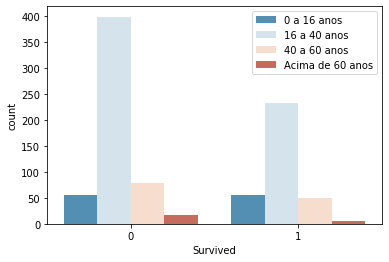

In [4]:
import pickle
from utils import impute_age_model

age_model = LogisticRegression(random_state=42)
age_model.fit(X,y)

with open('../models/age_model.pickle', 'wb') as p:
    pickle.dump(age_model, p)

for data in datasets:
    data['MissingAge'] = data.AgeGroup.isna()
    data['AgeGroup']= data[['AgeGroup', 'Pclass', 'SibSp', 'Parch']].apply(impute_age_model, axis=1).convert_dtypes()

LABELS = ["0 a 16 anos", "16 a 40 anos", "40 a 60 anos", "Acima de 60 anos"]
hist_surv_age_plt = sns.countplot(x='Survived',hue='AgeGroup', data=datasets[0], palette='RdBu_r')
plt.legend(labels=LABELS)
plt.show(hist_surv_age_plt)

#### 5. Local de Embarque - *Imput* de dados e identificacao

<AxesSubplot:xlabel='Survived', ylabel='count'>

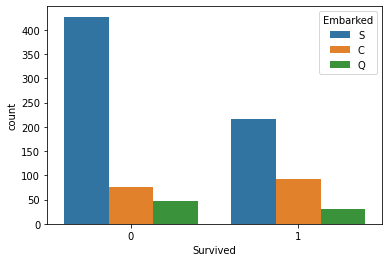

In [5]:
sns.countplot(x='Survived',hue='Embarked', data=datasets[0])

In [6]:
portos = datasets[0].Embarked.unique().tolist()
most_commom_idx = portos.index(datasets[0]["Embarked"].mode().tolist()[0])
embarked_groups = {}
for i, val in enumerate(portos):
    if type(val) == str:
        embarked_groups[val] = i
    else:
        embarked_groups[val] = most_commom_idx
for data in datasets:
    data['EmbarkedGroup'] = data['Embarked'].map(embarked_groups)


#### 6. Exclusão de dados

In [7]:
meaningless_features = ['Cabin', 'Ticket', 'Name', 'Fare', 'Age', 'Embarked']
for data in datasets:
    data.drop(meaningless_features , inplace=True, axis=1)

#### 7. Triangulo de Correlações

<AxesSubplot:>

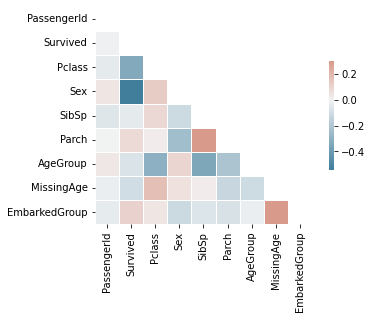

In [8]:
corr = datasets[0].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### 8. Saída - Guardando dados processados

In [9]:
datapaths = ["../data/train_upgrade.csv", "../data/test_upgrade.csv"]
for data, path in zip(datasets, datapaths):
    data.to_csv(path, index=False)

#### 9. Conclusão

Os dados salvos podem ser utilizados na elaboração dos modelos de ML para próximas estimativas.

Os dados estão guardados como numéricos em 'train_upgrade' e 'test_upgrade'. Os conjuntos de dados modificados contem:

* **'PassengerId':** Seq. numérica identificadora do passageiro.
* **'Survived':** Apenas em 'train_upgrade'. [0]- Não sobreviveu, [1]- Sobreviveu.
* **'Pclass':** Classe Social. [1]- Alta, [2]- Média, [3]- Baixa.
* **'Sex':** Gênero. [0]- Feminino, [1]-Masculino.
* **'SibSp':** Número de irmãos e cônjuge acompanhantes.
* **'Parch':**  Número de ancestrais e crianças acompanhantes.
* **'AgeGroup':** Faixa etária. [0]- 0 a 16 anos, [1]- 16 a 40 anos, [2]- 40 a 60 anos, [3]- Acima de 60 anos.
* **'EmbarkedGroup':** Porto de embarque numérico.
* **'MissingAge':** Feature criada dos dados faltantes de idade

Novas modificações dos dados podem ser abordadas futuramente, conforme observações na elaboração dos modelos.
